In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Libraries of NLTK
import re,string
import tensorflow as tf

import nltk
# nltk.download()

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier




### LOAD REQUIRED LIBRARIES

In [3]:
# Sample data loading (assuming CSV format)
data = pd.read_csv('data.csv',delimiter=',', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'], nrows = 1600000)
# df1 = pd.read_csv('data.csv', delimiter=',', nrows = nRowsRead)


In [4]:
data.shape

(1600000, 6)

### CLEANING OF DATA

In [76]:


#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords 
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text


def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
    text=lemmatization(text)
    return text

data['text']=data['text'].apply(clean_text)




### SAVE CLEANED DATA

In [78]:
data.to_csv("cleaneddata.csv", sep=",")

### VECTORZATION

In [79]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['target'].values



### TEST LABEL COUNTER

In [80]:

from collections import Counter

# Count occurrences of each class label
label_counts = Counter(y)

# Print label counts
for label, count in label_counts.items():
    print(f"{label}: {count}")


0: 800000
4: 800000


### TEST TRAIN SPLIT

In [81]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### GRADIENT BOOSTING CLASSIFIER

In [82]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# GBM Model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=True)
gbm.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.3771            7.26m
         2           1.3696            7.00m
         3           1.3631            6.87m
         4           1.3576            6.80m
         5           1.3528            6.88m
         6           1.3486            6.74m
         7           1.3446            6.62m
         8           1.3407            6.51m
         9           1.3371            6.42m
        10           1.3336            6.33m
        20           1.3049            5.57m
        30           1.2840            4.84m
        40           1.2658            4.84m
        50           1.2508            4.91m
        60           1.2388            4.15m
        70           1.2285            3.12m
        80           1.2192            2.07m
        90           1.2101           59.96s
       100           1.2024            0.00s


GradientBoostingClassifier(random_state=42, verbose=True)

### ADABOOST CLASSIFIER

In [85]:
# AdaBoost Model
base_estimator = DecisionTreeClassifier(max_depth=2)  # Ensure homogeneous base models
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)


c:\Users\hamza.qureshi\AppData\Local\anaconda3\envs\generalEnv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=100, random_state=42)

### EVALUATION 

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()



### PLOT CONFUSION MATRIX

GBM Accuracy:  0.693053125
AdaBoost Accuracy:  0.682284375


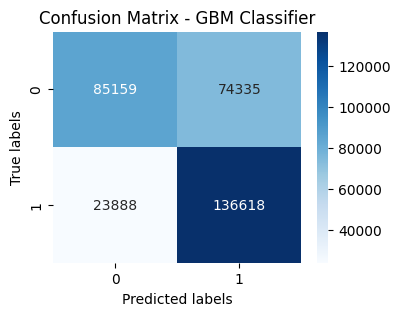

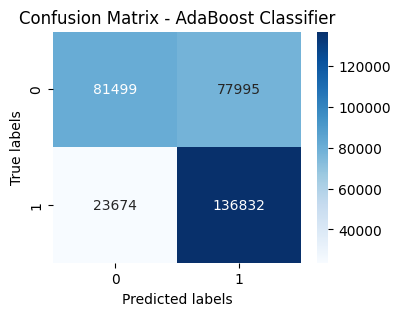

In [87]:
# Predictions
gbm_preds = gbm.predict(X_test)
adaboost_preds = adaboost.predict(X_test)

# Accuracy
gbm_accuracy = accuracy_score(y_test, gbm_preds)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)

print("GBM Accuracy: ", gbm_accuracy)
print("AdaBoost Accuracy: ", adaboost_accuracy)

# Plot confusion matrix for AdaBoost
plot_confusion_matrix(y_test, gbm_preds, title="Confusion Matrix - GBM Classifier")
# Plot confusion matrix for AdaBoost
plot_confusion_matrix(y_test, adaboost_preds, title="Confusion Matrix - AdaBoost Classifier")


### CUSTOM TESTING

In [90]:
# Example input string
input_text = "I love this movie! It's fantastic!"
#input_text = "I hate this movie! It's terrible!"

# Preprocess the input text (you can use the same preprocess_text function defined earlier)
preprocessed_text = clean_text(input_text)

# Vectorize the preprocessed text using the same vectorizer used during training
input_vector = vectorizer.transform([preprocessed_text])

# Make predictions using the trained model
prediction = gbm.predict(input_vector)

# Decode the predicted label using the label_encoder if needed
predicted_sentiment = label_encoder.inverse_transform(prediction)

print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: [4]
